In [ ]:
'''
Name: Subash Gupta Karamsetty
Znumber: Z23689645
Assignment Number: 8
Professor: Dr. Ghoraani

This is my Colab file link:
https://colab.research.google.com/drive/19CiTkdJpoYyTMn9BOZq-eCyvcxDbI33D
'''

# **Importing all the needed modules related to NumPy, Plots and Keras**

In [78]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import to_categorical

In [79]:
(x_train, y_train),(x_test, y_test) = mnist.load_data() #Loading the MNIST dataset from keras.datasets

# **Selecting only the 0s, 5s and 8s**

In [80]:
x_train058 = x_train[np.logical_or.reduce((y_train == 0, y_train == 5 , y_train == 8)), :, :]
y_train058 = y_train[np.logical_or.reduce((y_train == 0, y_train == 5, y_train == 8))]

x_test058 = x_test[np.logical_or.reduce((y_test == 0, y_test == 5 , y_test == 8)), :, :]
y_test058 = y_test[np.logical_or.reduce((y_test == 0, y_test == 5 , y_test == 8))]


# **Randomizing the training dataset and dividing them into the training and validation dataset in 80-20% combination**

In [81]:
indexes_058 = np.arange(0,x_train058.shape[0]) #creating a range array starting from 0 to training dataset images count.
x_train_058_random_indexes = np.random.permutation(indexes_058) #using the random function to randomize the images (using indexes).

x_train058 = x_train058[x_train_058_random_indexes, : , :] #restructuring the new training dataset images with the randomized indexes.
y_train058 = y_train058[x_train_058_random_indexes]        #restructuring the new training dataset labels respectively with the randomized indexes.
print("After ramdomizing, the training samples shape is : ",x_train058.shape,y_train058.shape)
sizes = int(x_train058.shape[0]*0.2)
x_val058 = x_train058[:sizes, : , :] #considering the 20% samples as validation dataset (This includes random images since randamized already)
y_val058 = y_train058[:sizes]
print("The first 20% samples cosnidered as validation set : ",x_val058.shape, y_val058.shape)

x_train058 = x_train058[int(x_train058.shape[0]*0.2):, : , :] #considering the remaining samples as the training dataset.
y_train058 = y_train058[sizes:]
print("The remaining will be the training set : ",x_train058.shape, y_train058.shape)

After ramdomizing, the training samples shape is :  (17195, 28, 28) (17195,)
The first 20% samples cosnidered as validation set :  (3439, 28, 28) (3439,)
The remaining will be the training set :  (13756, 28, 28) (13756,)


# **Extracting the features and dividing them into 4 parts for each image**

In [82]:
def feat_extract(images):
    width = images.shape[1]
    height = images.shape[2]
    features = np.zeros((images.shape[0], 4)) #creating a 4 column matrix
    features_temp = np.sum(images[:, :int(width/2), :int(height/2)], axis=2) # quadrant 0
    features[:, 0] = np.sum(features_temp, axis=1) / (width*height/4)
    features_temp = np.sum(images[:, :int(width/2), int(height/2):], axis=2) # quadrant 1
    features[:, 1] = np.sum(features_temp, axis=1) / (width*height/4)
    features_temp = np.sum(images[:, int(width/2):, :int(height/2)], axis=2) # quadrant 2
    features[:, 2] = np.sum(features_temp, axis=1) / (width*height/4)
    features_temp = np.sum(images[:, int(width/2):, int(height/2):], axis=2) # quadrant 3
    features[:, 3] = np.sum(features_temp, axis=1) / (width*height/4)
    return features

feature_train058 = feat_extract(x_train058)
feature_test058 = feat_extract(x_test058)
feature_val058 = feat_extract(x_val058)
print(feature_val058)

unique_labels_train = np.unique(y_train058)
print("Unique labels in y_train058:", unique_labels_train)

[[33.08163265 26.84693878 22.19897959 33.69897959]
 [17.51020408 23.58673469 21.32142857 23.29591837]
 [22.18367347 37.43367347 28.04591837 24.80612245]
 ...
 [49.92346939 54.77040816 62.48469388 50.14285714]
 [17.45918367 32.43877551 30.56632653 14.37755102]
 [48.5255102  47.14285714 30.44387755 52.67346939]]
Unique labels in y_train058: [0 5 8]


# **Labels to binary matrix using to_categorical**

In [83]:
label_mapping = {0: 0, 5: 1, 8: 2}

# Use the mapping to update labels in y_train058 into the 0 1 and 2 indexes so that it can represent properly when passing them to to_categorical
y_train058_mapped = np.array([label_mapping[label] for label in y_train058])
y_test058_mapped = np.array([label_mapping[label] for label in y_test058])
y_val058_mapped = np.array([label_mapping[label] for label in y_val058])

In [84]:
classes1 = [0, 1, 2] #after mapping, we changed them to 0,1,2
y_train058_c = to_categorical(y_train058_mapped, len(classes1)) #converting them to categorical form
y_test058_c = to_categorical(y_test058_mapped, len(classes1))
y_val058_c = to_categorical(y_val058_mapped, len(classes1))

# **The plot_curves function which will plot the accuracy curve and the loss curve**

In [85]:
def plot_curves(accuracys,losses): #the plot function which will plot the Accuracy for each epoch
    epochess = np.arange(losses.shape[0])
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.plot(epochess, accuracys)
    plt.show()


    plt.subplot(1,2,2) #the plot which will plot the Loss for each epoch
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Crossentropy Losses')
    plt.title('Training Loss')
    plt.plot(epochess, losses)
    plt.show()

# **The Model code**

In [86]:
def Step1_1layer(units_val): # 1Hidden layer case (first 3 networks)
    #Step1:
    model = Sequential()
    model.add(Dense(input_dim = 4, units = units_val, activation='tanh'))
    model.add(Dense(units = 3, activation = 'softmax'))
    model.summary()
    return model

def Step2to5(model): #the remaining steps
    #Step2:
    optimize = SGD(learning_rate = 0.0001)
    model.compile(optimizer=optimize, loss='categorical_crossentropy', metrics=['accuracy'])

    #Step3:
    history = model.fit(feature_train058, y_train058_c, batch_size=16, epochs=30, verbose = 1)
    print("-*-"*60)

    #Step4:
    train_scores = model.evaluate(feature_train058, y_train058_c)
    print("Training Loss:", train_scores[0])
    print("Training Accuracy:", train_scores[1])
    print("-*-"*60)
    val_scores = model.evaluate(feature_val058, y_val058_c)
    print("Validation Loss:", val_scores[0])
    print("Validation Accuracy:", val_scores[1])
    print("-*-"*60)

    plt.figure(figsize=[9,5])
    accuracy_curve = np.array(history.history['accuracy'])
    loss_curve = np.array(history.history['loss'])
    plot_curves(accuracy_curve, loss_curve)

def Step1_2layers(unit_val1,unit_val2): # 2hidden layer cases for the 4,5 networks
    #Step1:
    model = Sequential()
    model.add(Dense(input_dim = 4, units = unit_val1, activation='tanh'))
    model.add(Dense(units = unit_val2, activation='tanh'))
    model.add(Dense(units = 3, activation = 'softmax'))
    model.summary()
    return model

# **The model training and validation part**
The model is build and trained with different neurons count. Also an additional layer is added in the hidden layer and its has different neurons count

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 16)                80        
                                                                 
 dense_63 (Dense)            (None, 3)                 51        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
860/860 [==============================] - 2s 2ms/step - loss: 1.1540 - accuracy: 0.4124
Epoch 2/30
860/860 [==============================] - 2s 2ms/step - loss: 1.1126 - accuracy: 0.4267
Epoch 3/30
860/860 [==============================] - 2s 2ms/step - loss: 1.0900 - accuracy: 0.4435
Epoch 4/30
860/860 [==============================] - 1s 1ms/step - loss: 1.0764 - accuracy: 0.4559
Epoch 5/30


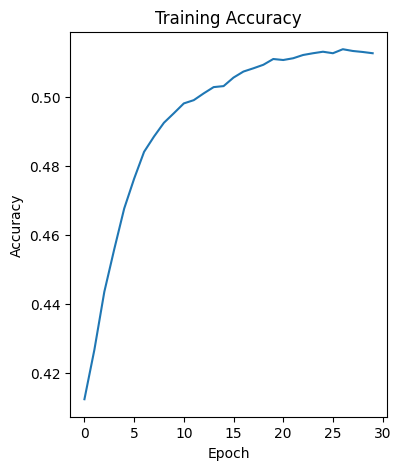

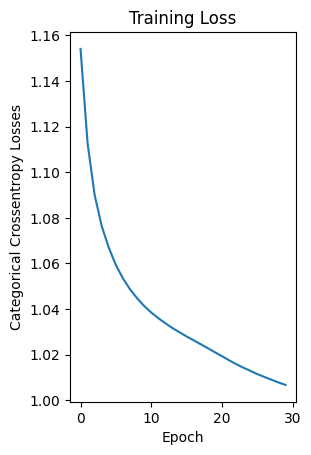

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 64)                320       
                                                                 
 dense_65 (Dense)            (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
860/860 [==============================] - 2s 2ms/step - loss: 1.0709 - accuracy: 0.4322
Epoch 2/30
860/860 [==============================] - 1s 2ms/step - loss: 1.0171 - accuracy: 0.5083
Epoch 3/30
860/860 [==============================] - 1s 2ms/step - loss: 1.0043 - accuracy: 0.5200
Epoch 4/30
860/860 [==============================] - 2s 2ms/step - loss: 0.9972 - accuracy: 0.5242
Epoch 5/30
860/860 

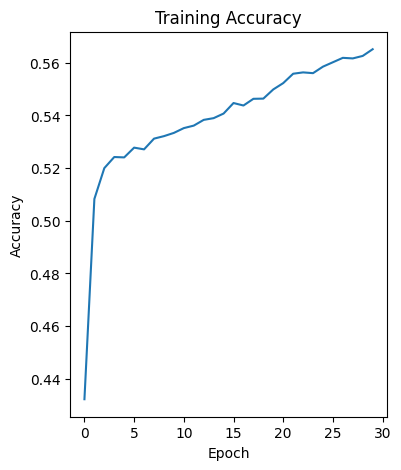

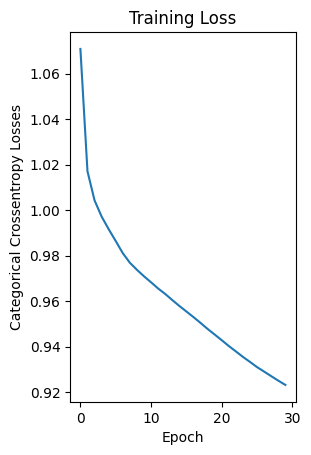

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 128)               640       
                                                                 
 dense_67 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1027 (4.01 KB)
Trainable params: 1027 (4.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
860/860 [==============================] - 2s 2ms/step - loss: 1.0812 - accuracy: 0.4388
Epoch 2/30
860/860 [==============================] - 1s 2ms/step - loss: 0.9917 - accuracy: 0.5340
Epoch 3/30
860/860 [==============================] - 1s 2ms/step - loss: 0.9665 - accuracy: 0.5510
Epoch 4/30
860/860 [==============================] - 1s 2ms/step - loss: 0.9534 - accuracy: 0.5537
Epoch 5/30
860/86

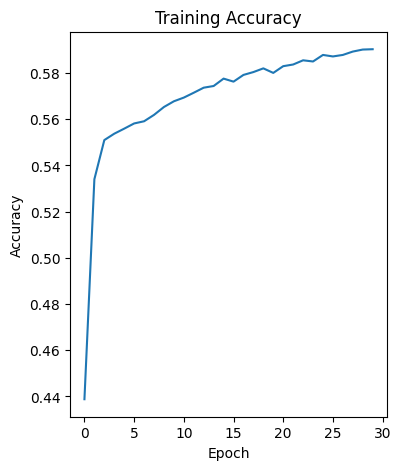

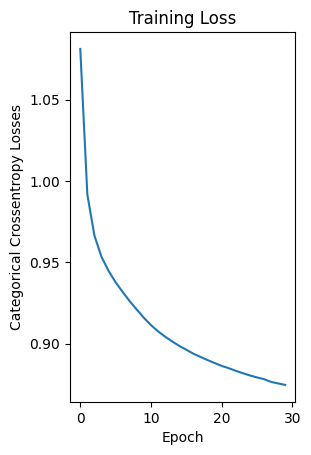

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 128)               640       
                                                                 
 dense_69 (Dense)            (None, 16)                2064      
                                                                 
 dense_70 (Dense)            (None, 3)                 51        
                                                                 
Total params: 2755 (10.76 KB)
Trainable params: 2755 (10.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
860/860 [==============================] - 3s 2ms/step - loss: 1.1507 - accuracy: 0.3652
Epoch 2/30
860/860 [==============================] - 1s 2ms/step - loss: 1.0576 - accuracy: 0.4301
Epoch 3/30
860/860 [==============================] - 1s 2ms/step - loss: 1.0171 - 

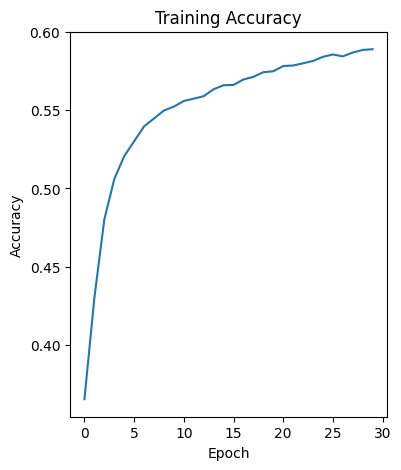

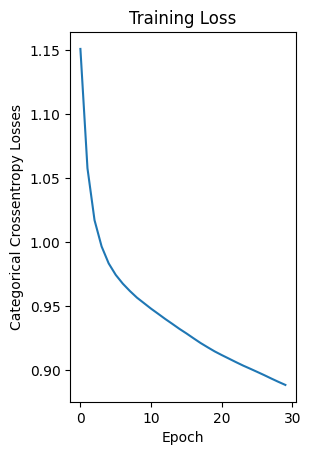

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 128)               640       
                                                                 
 dense_72 (Dense)            (None, 64)                8256      
                                                                 
 dense_73 (Dense)            (None, 3)                 195       
                                                                 
Total params: 9091 (35.51 KB)
Trainable params: 9091 (35.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
860/860 [==============================] - 2s 2ms/step - loss: 1.1543 - accuracy: 0.3777
Epoch 2/30
860/860 [==============================] - 2s 2ms/step - loss: 1.0316 - accuracy: 0.4847
Epoch 3/30
860/860 [==============================] - 1s 2ms/step - loss: 0.9969 - 

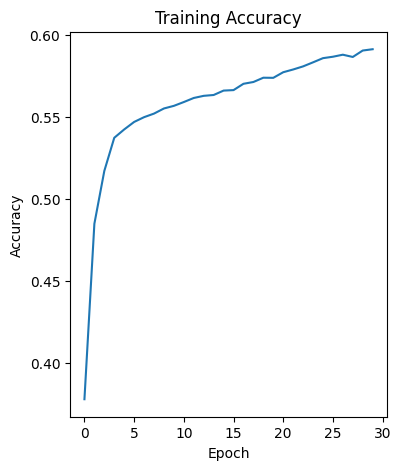

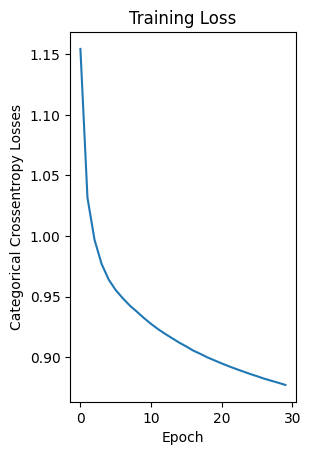

In [87]:
#for the first 3 cases we have the layers same but the number of neurons i.e., the units are changing. so I took all the 3 different units as a list and passing it to the function and running the first 3 cases.
output_models=[]
units_values = [16,64,128]
for units_val in units_values:
    model = Step1_1layer(units_val)
    output_models.append(model)
    Step2to5(model)

#case4,5:
unit_vals1 = 128
unit_vals2 = [16,64]
for r in unit_vals2:
    model = Step1_2layers(unit_vals1, r)
    output_models.append(model)
    Step2to5(model)

# **The Table for different models and layers**

We have trained the model with 1 hidden and 2 hidden layers with different nodes count. We have the following Observations as tabulated:

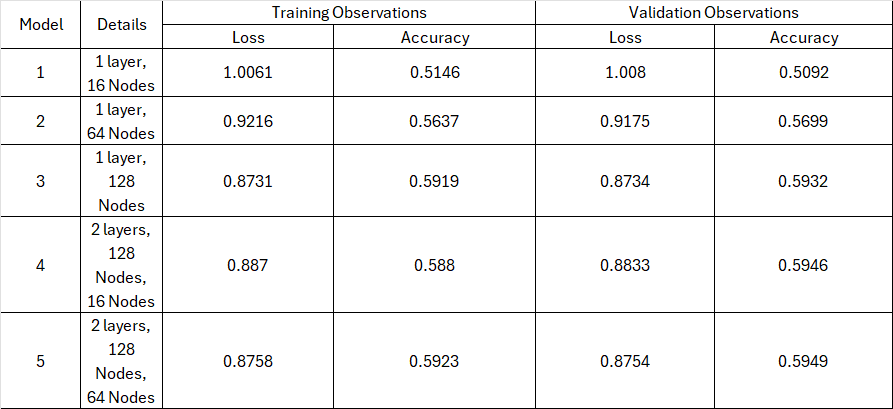

As the number of nodes increases in the single hidden layer(Models 1,2 and 3), we can see a decrease in the training and the validation loss values and an increase in the accuracy values. In model 4 when additional layer is added 2 layers, 128 nodes and 16 nodes case, we can see a decrease in the accuracy and increase in loss. In model 5 it is again improved.

If we observe from the above table, we can say that, though the accuracy's are lower for this model, out of the above 5, we can say that Model 3 and Model 5's accuracy's are approximately the same. The accuracy in model 3 is high in all the models, and the training and validation loss and accuracy values seem similar. Having an additional hidden layer in model 5 does not seem to show much improvement in performance when compared with model 3. It only makes the model complex but has no significant change in accuracy. After observing their plots, I came to the conclusion that I should select Model 3 as the final model.

# **Model Evaluation with Testing set**

In [92]:
#Based on the above explanation and graphs, I have selected the model 3 i.e., 1 layer and 128 nodes as the best behavior model. So, testing the testing dataset on the selected model, we get the loss and accuracy values as:
test_score = output_models[2].evaluate(feature_test058, y_test058_c)
print("Testing Loss:", test_score[0])
print("Testing Accuracy:", test_score[1])


89/89 [==============================] - 0s 2ms/step - loss: 0.8890 - accuracy: 0.5808
Testing Loss: 0.8890480399131775
Testing Accuracy: 0.5808151960372925


In [89]:
#Completed.
# Below code will help me in downloading the code file with graphs as PDF properly.
#Referred from youtube link: https://www.youtube.com/watch?v=-Ti9Mm21uVc

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf /content/Assignment8_CAP6619_SubashGuptaKaramsetty_Z23689645.ipynb